In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-05-15 10:52:27--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip.1’

dogscats.zip.1      100%[===================>] 817.50M  23.4MB/s    in 37s     

2018-05-15 10:53:04 (22.1 MB/s) - ‘dogscats.zip.1’ saved [857214334/857214334]



In [0]:
!rm dogscats.zip.1

In [6]:
!ls

datalab  dogscats.zip


In [0]:
import os
#os.mkdir("data")
os.mkdir("preview")

In [0]:
!unzip dogscats.zip -d /data

In [54]:
!ls /data/dogscats/

models	sample	test1  train  valid


(1, 374, 500, 3)

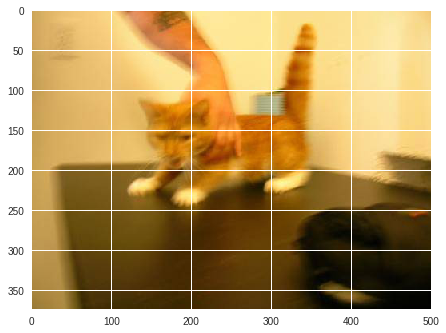

In [48]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/data/dogscats/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(img)
x.shape

In [0]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [58]:
!ls

data  datalab  dogscats.zip  first_try.h5  preview


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/data/dogscats/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/data/dogscats/valid',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [57]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5') 

Epoch 1/50
125/125 [==============================] - 92s 734ms/step - loss: 0.7046 - acc: 0.5310 - val_loss: 0.6904 - val_acc: 0.5262
Epoch 2/50
125/125 [==============================] - 91s 727ms/step - loss: 0.6886 - acc: 0.5875 - val_loss: 0.7194 - val_acc: 0.5250
Epoch 3/50
125/125 [==============================] - 91s 730ms/step - loss: 0.6738 - acc: 0.6050 - val_loss: 0.6479 - val_acc: 0.6262
Epoch 4/50
 28/125 [=====>........................] - ETA: 1:02 - loss: 0.6611 - acc: 0.6272

125/125 [==============================] - 91s 728ms/step - loss: 0.6538 - acc: 0.6440 - val_loss: 0.6084 - val_acc: 0.6500
Epoch 5/50
125/125 [==============================] - 91s 730ms/step - loss: 0.6336 - acc: 0.6660 - val_loss: 0.6504 - val_acc: 0.6375
Epoch 6/50
125/125 [==============================] - 91s 729ms/step - loss: 0.6015 - acc: 0.6850 - val_loss: 0.6013 - val_acc: 0.6663
Epoch 7/50
 42/125 [=========>....................] - ETA: 54s - loss: 0.6153 - acc: 0.6860

125/125 [==============================] - 93s 744ms/step - loss: 0.6027 - acc: 0.6805 - val_loss: 0.6537 - val_acc: 0.6150
Epoch 8/50
125/125 [==============================] - 94s 751ms/step - loss: 0.6021 - acc: 0.6885 - val_loss: 0.5430 - val_acc: 0.7288
Epoch 9/50
125/125 [==============================] - 92s 733ms/step - loss: 0.6045 - acc: 0.6765 - val_loss: 0.5606 - val_acc: 0.6813
Epoch 10/50
 44/125 [=========>....................] - ETA: 52s - loss: 0.6095 - acc: 0.6818

125/125 [==============================] - 91s 727ms/step - loss: 0.5975 - acc: 0.6885 - val_loss: 0.5680 - val_acc: 0.7212
Epoch 11/50
125/125 [==============================] - 91s 732ms/step - loss: 0.5898 - acc: 0.6940 - val_loss: 0.5657 - val_acc: 0.7113
Epoch 12/50
125/125 [==============================] - 90s 719ms/step - loss: 0.5736 - acc: 0.7200 - val_loss: 0.5257 - val_acc: 0.7388
Epoch 13/50
 43/125 [=========>....................] - ETA: 51s - loss: 0.5369 - acc: 0.7544

125/125 [==============================] - 89s 715ms/step - loss: 0.5592 - acc: 0.7270 - val_loss: 0.5021 - val_acc: 0.7638
Epoch 14/50
125/125 [==============================] - 89s 715ms/step - loss: 0.5493 - acc: 0.7300 - val_loss: 0.5125 - val_acc: 0.7625
Epoch 15/50
125/125 [==============================] - 93s 746ms/step - loss: 0.5413 - acc: 0.7265 - val_loss: 0.5184 - val_acc: 0.7412
Epoch 16/50
 43/125 [=========>....................] - ETA: 54s - loss: 0.5332 - acc: 0.7427

125/125 [==============================] - 94s 751ms/step - loss: 0.5564 - acc: 0.7245 - val_loss: 0.5328 - val_acc: 0.7300
Epoch 17/50
125/125 [==============================] - 93s 744ms/step - loss: 0.5361 - acc: 0.7475 - val_loss: 0.5447 - val_acc: 0.7137
Epoch 18/50
125/125 [==============================] - 93s 746ms/step - loss: 0.5420 - acc: 0.7315 - val_loss: 0.4885 - val_acc: 0.7562
Epoch 19/50
 43/125 [=========>....................] - ETA: 53s - loss: 0.5256 - acc: 0.7427

125/125 [==============================] - 93s 746ms/step - loss: 0.5298 - acc: 0.7375 - val_loss: 0.5117 - val_acc: 0.7438
Epoch 20/50
125/125 [==============================] - 94s 751ms/step - loss: 0.5127 - acc: 0.7575 - val_loss: 0.4939 - val_acc: 0.7675
Epoch 21/50
125/125 [==============================] - 94s 752ms/step - loss: 0.5265 - acc: 0.7430 - val_loss: 1.1052 - val_acc: 0.6525
Epoch 22/50
 43/125 [=========>....................] - ETA: 54s - loss: 0.5369 - acc: 0.7398

125/125 [==============================] - 94s 755ms/step - loss: 0.5037 - acc: 0.7590 - val_loss: 0.5346 - val_acc: 0.7638
Epoch 23/50
125/125 [==============================] - 93s 748ms/step - loss: 0.5163 - acc: 0.7535 - val_loss: 0.5243 - val_acc: 0.7475
Epoch 24/50
125/125 [==============================] - 95s 762ms/step - loss: 0.5187 - acc: 0.7465 - val_loss: 0.5927 - val_acc: 0.7300
Epoch 25/50
 43/125 [=========>....................] - ETA: 54s - loss: 0.5084 - acc: 0.7660

125/125 [==============================] - 94s 750ms/step - loss: 0.5157 - acc: 0.7545 - val_loss: 0.4777 - val_acc: 0.7750
Epoch 26/50
125/125 [==============================] - 94s 753ms/step - loss: 0.4951 - acc: 0.7645 - val_loss: 0.5044 - val_acc: 0.7412
Epoch 27/50
125/125 [==============================] - 96s 766ms/step - loss: 0.5163 - acc: 0.7645 - val_loss: 0.4646 - val_acc: 0.7775
Epoch 28/50
 43/125 [=========>....................] - ETA: 55s - loss: 0.4686 - acc: 0.7805

125/125 [==============================] - 96s 769ms/step - loss: 0.4993 - acc: 0.7690 - val_loss: 0.4731 - val_acc: 0.7963
Epoch 29/50
125/125 [==============================] - 96s 765ms/step - loss: 0.5051 - acc: 0.7700 - val_loss: 0.5115 - val_acc: 0.7612
Epoch 30/50
125/125 [==============================] - 96s 765ms/step - loss: 0.5008 - acc: 0.7725 - val_loss: 0.4406 - val_acc: 0.7850
Epoch 31/50
 43/125 [=========>....................] - ETA: 56s - loss: 0.4793 - acc: 0.7733

125/125 [==============================] - 96s 768ms/step - loss: 0.5257 - acc: 0.7515 - val_loss: 0.5001 - val_acc: 0.7538
Epoch 32/50
125/125 [==============================] - 95s 764ms/step - loss: 0.4997 - acc: 0.7765 - val_loss: 0.4890 - val_acc: 0.7675
Epoch 33/50
125/125 [==============================] - 93s 745ms/step - loss: 0.4909 - acc: 0.7735 - val_loss: 0.4665 - val_acc: 0.7875
Epoch 34/50
 43/125 [=========>....................] - ETA: 53s - loss: 0.4667 - acc: 0.7863

125/125 [==============================] - 93s 743ms/step - loss: 0.4911 - acc: 0.7825 - val_loss: 0.4772 - val_acc: 0.7875
Epoch 35/50
125/125 [==============================] - 94s 749ms/step - loss: 0.4797 - acc: 0.7860 - val_loss: 0.4614 - val_acc: 0.8050
Epoch 36/50
125/125 [==============================] - 92s 736ms/step - loss: 0.5023 - acc: 0.7750 - val_loss: 0.4963 - val_acc: 0.7700
Epoch 37/50
 43/125 [=========>....................] - ETA: 52s - loss: 0.4885 - acc: 0.7834

125/125 [==============================] - 92s 737ms/step - loss: 0.5083 - acc: 0.7620 - val_loss: 0.4455 - val_acc: 0.8000
Epoch 38/50
125/125 [==============================] - 93s 742ms/step - loss: 0.4834 - acc: 0.7780 - val_loss: 0.4256 - val_acc: 0.8087
Epoch 39/50
125/125 [==============================] - 93s 743ms/step - loss: 0.4800 - acc: 0.7795 - val_loss: 0.4459 - val_acc: 0.8087
Epoch 40/50
 43/125 [=========>....................] - ETA: 53s - loss: 0.4882 - acc: 0.8067

125/125 [==============================] - 93s 743ms/step - loss: 0.4882 - acc: 0.7875 - val_loss: 0.4884 - val_acc: 0.7825
Epoch 41/50
125/125 [==============================] - 93s 743ms/step - loss: 0.4803 - acc: 0.7810 - val_loss: 0.4462 - val_acc: 0.8087
Epoch 42/50
125/125 [==============================] - 93s 742ms/step - loss: 0.4883 - acc: 0.7750 - val_loss: 0.4364 - val_acc: 0.8187
Epoch 43/50
 43/125 [=========>....................] - ETA: 53s - loss: 0.4827 - acc: 0.7602

125/125 [==============================] - 93s 748ms/step - loss: 0.4940 - acc: 0.7635 - val_loss: 0.4490 - val_acc: 0.7987
Epoch 44/50
125/125 [==============================] - 94s 748ms/step - loss: 0.4894 - acc: 0.7740 - val_loss: 0.4689 - val_acc: 0.7950
Epoch 45/50
125/125 [==============================] - 94s 753ms/step - loss: 0.4728 - acc: 0.7835 - val_loss: 0.4424 - val_acc: 0.7913
Epoch 46/50
 43/125 [=========>....................] - ETA: 55s - loss: 0.4766 - acc: 0.7776

125/125 [==============================] - 94s 756ms/step - loss: 0.4668 - acc: 0.7805 - val_loss: 0.5548 - val_acc: 0.7675
Epoch 47/50
125/125 [==============================] - 96s 770ms/step - loss: 0.4814 - acc: 0.7705 - val_loss: 0.4352 - val_acc: 0.8075
Epoch 48/50
125/125 [==============================] - 94s 753ms/step - loss: 0.4796 - acc: 0.7770 - val_loss: 0.5775 - val_acc: 0.7562
Epoch 49/50
 43/125 [=========>....................] - ETA: 54s - loss: 0.4751 - acc: 0.7805

125/125 [==============================] - 95s 756ms/step - loss: 0.4593 - acc: 0.7870 - val_loss: 0.4467 - val_acc: 0.7825
Epoch 50/50
125/125 [==============================] - 95s 760ms/step - loss: 0.5131 - acc: 0.7680 - val_loss: 0.4152 - val_acc: 0.8175


In [0]:
from google.colab import files
files.download('first_try.h5')